In [1]:
#import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Label Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    mean_squared_error,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    auc
)


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score,RandomizedSearchCV

import warnings

warnings.filterwarnings("ignore")

In [2]:
credit_df = pd.read_csv("credit.csv")

In [3]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
credit_df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [6]:
# this gives info about how many unique value in categorical columns
credit_df.select_dtypes(include='object').nunique()

checking_balance       4
credit_history         5
purpose                6
savings_balance        5
employment_duration    5
other_credit           3
housing                3
job                    4
phone                  2
default                2
dtype: int64

In [7]:
# This time we will check any invalid values are getting counted as unique values 
for col in credit_df.select_dtypes(include='object').columns:
    print(col, " : ",credit_df[col].unique())

checking_balance  :  ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
credit_history  :  ['critical' 'good' 'poor' 'perfect' 'very good']
purpose  :  ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
savings_balance  :  ['unknown' '< 100 DM' '500 - 1000 DM' '> 1000 DM' '100 - 500 DM']
employment_duration  :  ['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']
other_credit  :  ['none' 'bank' 'store']
housing  :  ['own' 'other' 'rent']
job  :  ['skilled' 'unskilled' 'management' 'unemployed']
phone  :  ['yes' 'no']
default  :  ['no' 'yes']


### Preprocessing  

In [8]:
# car0 and car are same so we can replace car0 with car
credit_df['purpose'].replace('car0','car',inplace  = True)

### Exploratory Data Analysis (EDA)

In [9]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [10]:
credit_df.describe(include=['O']).T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,5,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


## Visualization

<Figure size 1400x1400 with 0 Axes>

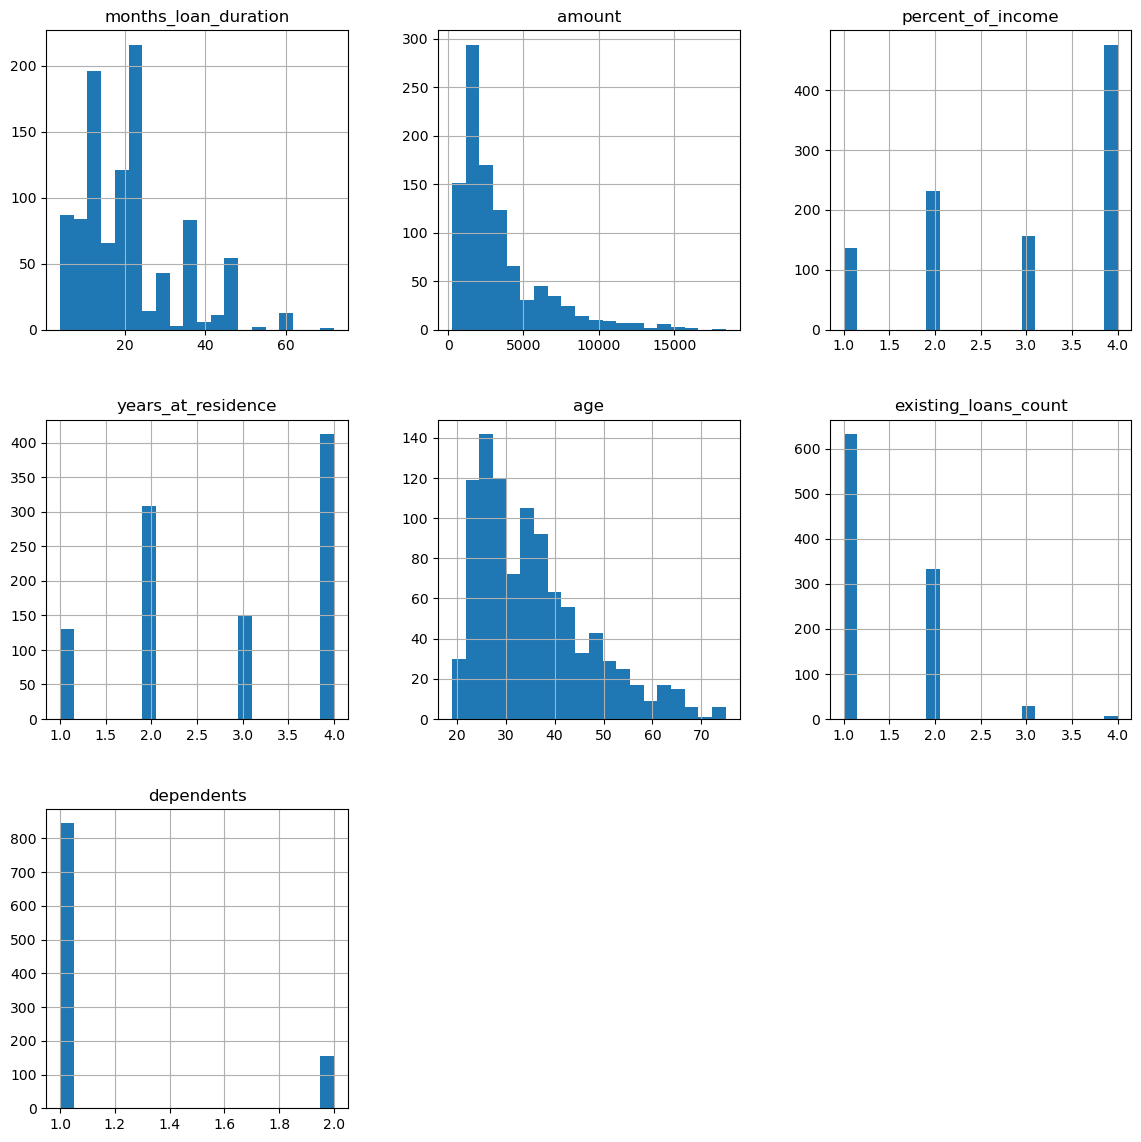

In [11]:
num_cols = credit_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 14))
num_cols.hist(figsize=(14, 14), bins=20)
plt.show()

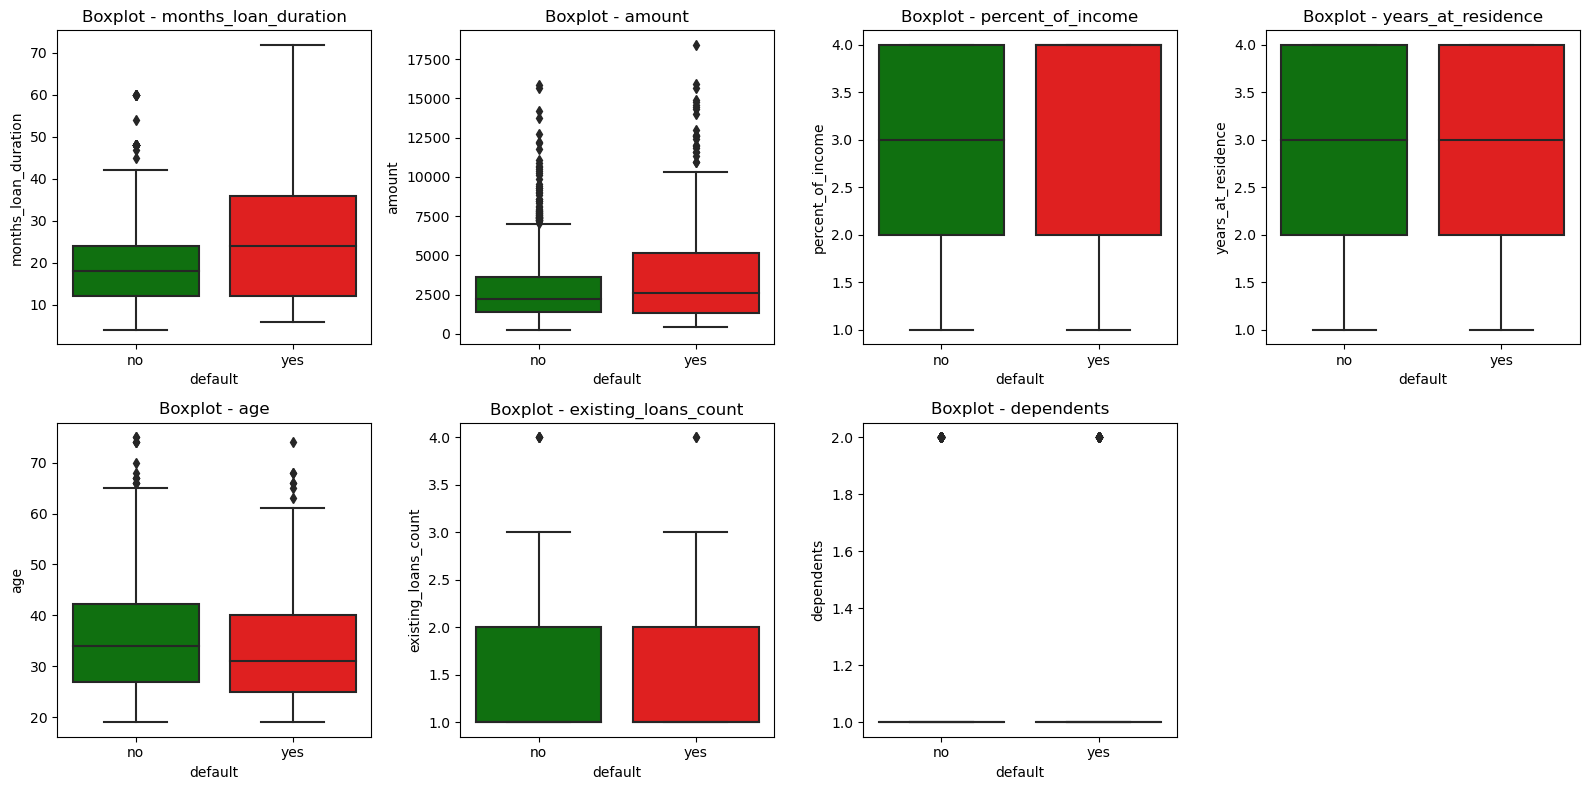

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes_flat = axes.flatten()
for i, col in enumerate(num_cols.columns):
    sns.boxplot(data=credit_df, x='default', y=col, palette=['green', 'red'], ax=axes_flat[i])
    axes_flat[i].set_title(f'Boxplot - {col}')
axes_flat[-1].axis('off')
plt.tight_layout()
plt.show()

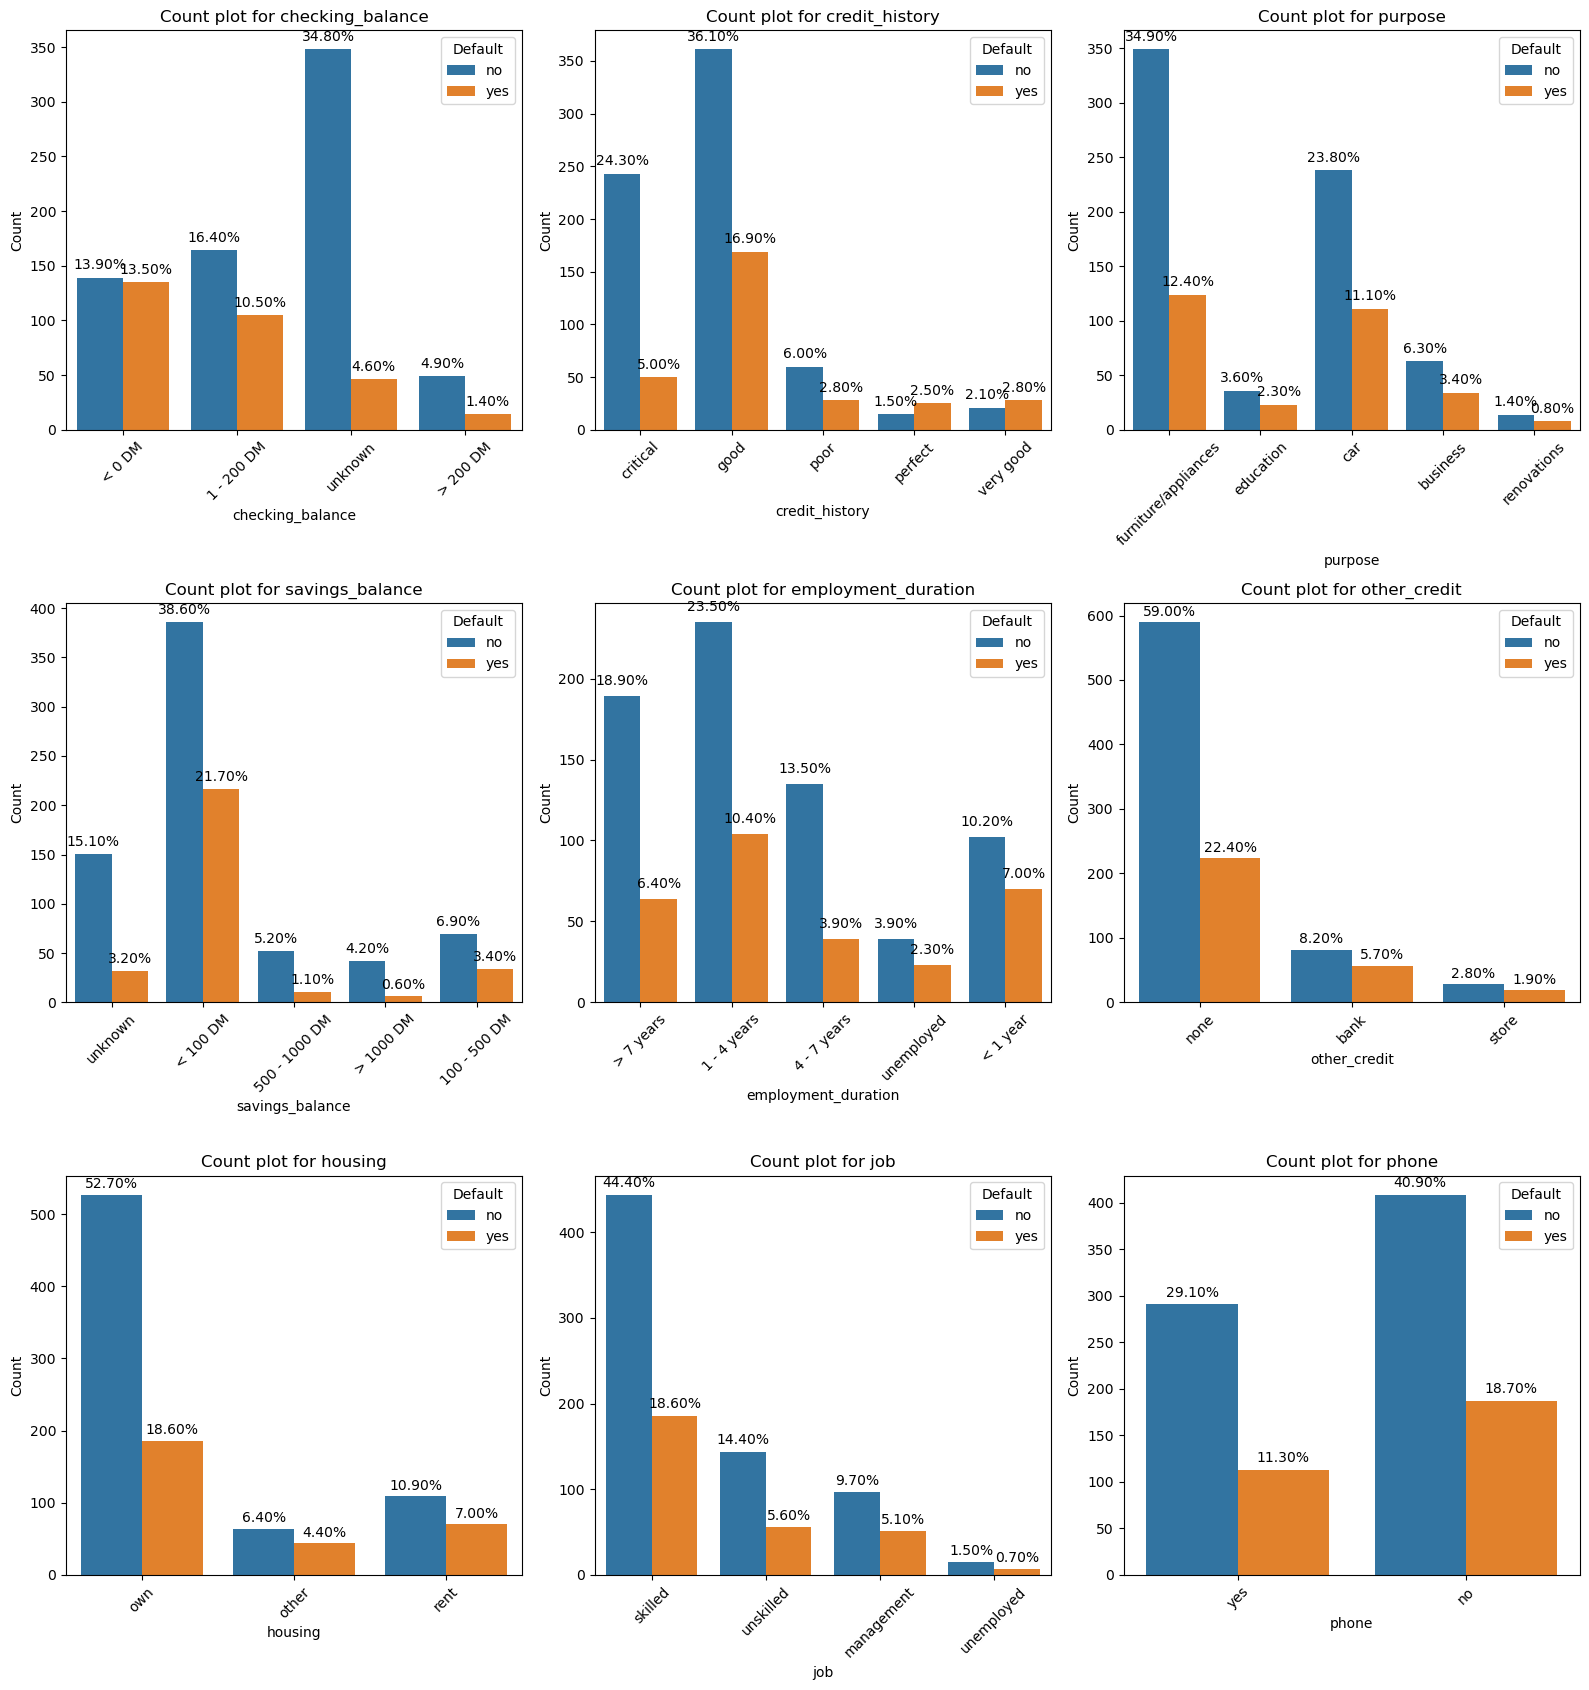

In [13]:
categorical_cols = credit_df.select_dtypes(include=['object'])
categorical_cols = categorical_cols.drop(columns=['default'])
fig, axes = plt.subplots(3, 3, figsize=(16, 17))
axes_flat = axes.flatten()
for i, col in enumerate(categorical_cols.columns):
    sns.countplot(data=credit_df, x=col, hue='default', ax=axes_flat[i])
    axes_flat[i].set_title(f'Count plot for {col}')
    axes_flat[i].set_xlabel(col)
    axes_flat[i].set_ylabel('Count')
    axes_flat[i].legend(title='Default', loc='upper right')
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
    total = float(len(credit_df))
    for p in axes_flat[i].patches:
        height = p.get_height()
        axes_flat[i].text(p.get_x() + p.get_width() / 2., height + 5,
                          '{:.2f}%'.format((height / total) * 100),
                          ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Correlation Analysis

<Axes: >

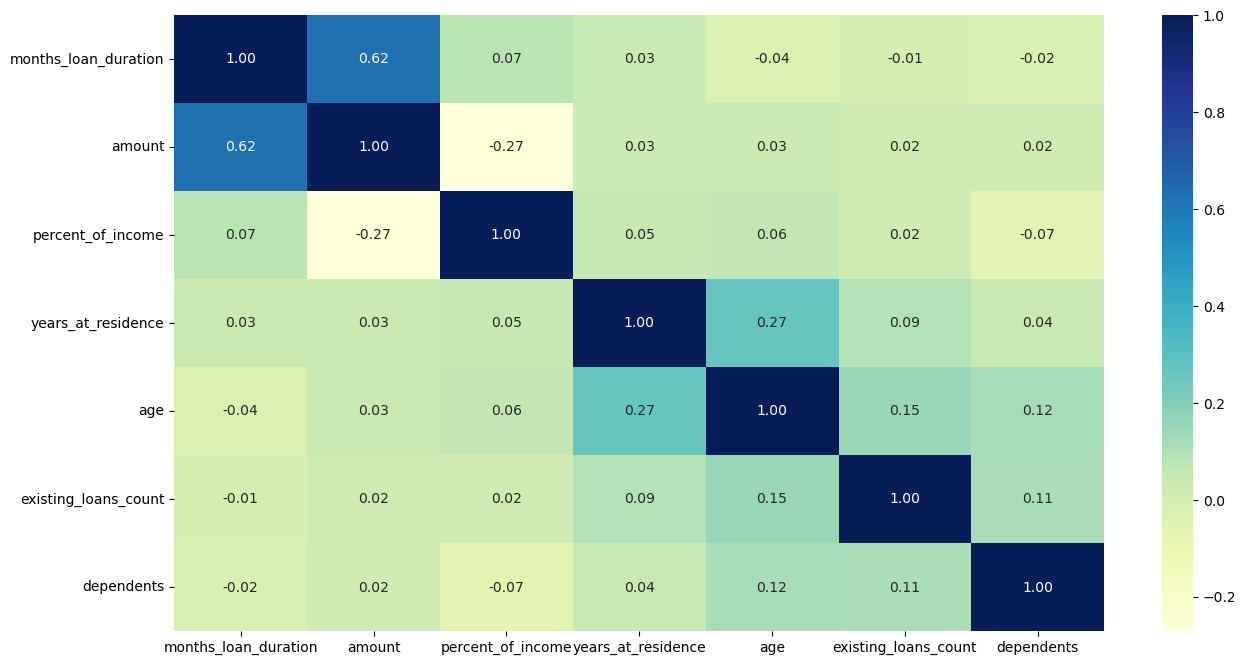

In [14]:
plt.figure(figsize = (15, 8))
sns.heatmap(num_cols.corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

## Test -Train Split

In [15]:
# we have to map the default value for now other values will encoded later in preprocessing
credit_df['default'] = credit_df['default'].map({'yes': 1, 'no': 0})

In [16]:
X = credit_df.drop(columns="default")
Y = credit_df["default"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)
print(X_train.shape, X_test.shape)

(700, 16) (300, 16)


### Transformation

In [18]:
transformer = ColumnTransformer(transformers= [
    ('tf1', OrdinalEncoder(categories=[["critical", "good", "poor" ,"perfect","very good"]]),["credit_history"]),
    ('tf2', OrdinalEncoder(categories=[["skilled","unskilled","management","unemployed"]]),["job"]),
    ('tf3', OneHotEncoder(drop='first', sparse_output=False),['purpose']),
    ('tf4', OneHotEncoder(drop='first', sparse_output=False),['other_credit']),
    ('tf5', OneHotEncoder(drop='first', sparse_output=False),['phone']),
    ('tf6', OneHotEncoder(drop='first', sparse_output=False),['housing']),
    ('tf7', OneHotEncoder(drop='first', sparse_output=False),['savings_balance']),
    ('tf8', OneHotEncoder(drop='first', sparse_output=False),['employment_duration']),
    ('tf9', OneHotEncoder(drop='first', sparse_output=False),['checking_balance'])
], remainder = 'passthrough')

transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('tf1',
                                 OrdinalEncoder(categories=[['critical', 'good',
                                                             'poor', 'perfect',
                                                             'very good']]),
                                 ['credit_history']),
                                ('tf2',
                                 OrdinalEncoder(categories=[['skilled',
                                                             'unskilled',
                                                             'management',
                                                             'unemployed']]),
                                 ['job']),
                                ('tf3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['purpose']),
                                ('tf4',
                                 OneHotEncoder(drop='...
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['phone']),
                                ('tf6',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['housing']),
                                ('tf7',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['savings_balance']),
                                ('tf8',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['employment_duration']),
                                ('tf9',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['checking_balance'])])

In [19]:
X_train = transformer.fit_transform(X_train)

In [20]:
X_test = transformer.fit_transform(X_test)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 913 to 172
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tf1__credit_history                   700 non-null    float64
 1   tf2__job                              700 non-null    float64
 2   tf3__purpose_car                      700 non-null    float64
 3   tf3__purpose_education                700 non-null    float64
 4   tf3__purpose_furniture/appliances     700 non-null    float64
 5   tf3__purpose_renovations              700 non-null    float64
 6   tf4__other_credit_none                700 non-null    float64
 7   tf4__other_credit_store               700 non-null    float64
 8   tf5__phone_yes                        700 non-null    float64
 9   tf6__housing_own                      700 non-null    float64
 10  tf6__housing_rent                     700 non-null    float64
 11  tf7__savings_bala

In [22]:

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_train = pd.DataFrame(x_train, columns = X_train.columns)
x_test = sc.transform(X_test)
x_test = pd.DataFrame(x_test, columns=X_test.columns)


In [23]:
invalid_chars = {'[', ']', '<'}
invalid_feature_names = [name for name in x_train.columns if any(char in invalid_chars for char in name)]
print("Invalid feature names:", invalid_feature_names)
if invalid_feature_names:
    modified_feature_names = [name.replace('<', 'less_than') for name in X_train.columns]
    x_train.columns = modified_feature_names
    x_test.columns = modified_feature_names

Invalid feature names: ['tf7__savings_balance_< 100 DM', 'tf8__employment_duration_< 1 year', 'tf9__checking_balance_< 0 DM']


### Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
 1. Predicting a customer will default and the customer dosen't default - Leads to Customer disatisfaction
 2. Predicting a customer will not default and the customer defaults - Leads to financial losses for the bank

#### Which case is more important?
 When considering the above cases the 2nd case is more important because the bank approves a loan for a customer who eventually defaults, leading to financial losses for the bank.
 #### So all models we have to consider recall more while maintaining acceptable levels of accuracy and precision.

### First we will try all the models without hyperparameter tuning so that we can find out which Model performs well on test dataset

In [24]:
def model_performance_classification_sklearn(model,x_test,x_train,ytest,ytrain ):
    predTest = model.predict(x_test)
    predTrain = model.predict(x_train)
    roc_aucTest = roc_auc_score(ytest,predTest)
    roc_aucTrain = roc_auc_score(y_train,predTrain)
    print("Training performance:")
    print(classification_report(ytrain, predTrain))
    print("AUC - ROC", roc_aucTrain)
    print("*************************************************")

    print("Test performance:")
    print(classification_report(ytest, predTest))
    print("AUC - ROC", roc_aucTest)
    print("*************************************************")
    

In [25]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [26]:
def prior_error_rate(confusion_mtx):
    return 1 - (np.sum(confusion_mtx[1, :]) / np.sum(confusion_mtx))
def total_error_rate(confusion_mtx):
    return 1 -  accuracy(confusion_mtx)
def accuracy(confusion_mtx):
    return (confusion_mtx[0, 0] + confusion_mtx[1, 1]) / np.sum(confusion_mtx)
def recall(confusion_mtx):
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[1, :])
def false_negative_rate(confusion_mtx):
    return confusion_mtx[1, 0] / np.sum(confusion_mtx[1, :])
def false_positive_rate(confusion_mtx):
    return confusion_mtx[0, 1] / np.sum(confusion_mtx[0, :])
def true_negative_rate(confusion_mtx):
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[0, :])
def precision(confusion_mtx):
    return confusion_mtx[1, 1] / np.sum(confusion_mtx[:, 1])
def negative_predictive_value(confusion_mtx):
    return confusion_mtx[0, 0] / np.sum(confusion_mtx[:, 0])
def classifier_stats(model, predictors, target):
    predicted =  model.predict(predictors)
    cm = confusion_matrix(target, predicted)
    return pd.Series({'prior_error_rate': prior_error_rate(cm),
                      'total_error_rate': total_error_rate(cm),
                      'recall': recall(cm),
                      'false_negative_rate': false_negative_rate(cm),
                      'false_positive_rate': false_positive_rate(cm),
                      'true_negative_rate (specificity)': true_negative_rate(cm),
                      'precision': precision(cm),
                      'negative_predictive_value': negative_predictive_value(cm),
                     'accuracy':accuracy(cm)})

In [27]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()))
models.append(('SGD Classifier', SGDClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('XGB Classifier', XGBClassifier()))

# Model Evaluation

result_df_train = pd.DataFrame()
result_df_test = pd.DataFrame()

for model_name, model in models:
    model = model.fit(x_train,y_train)
    stats_test =classifier_stats(model,x_test,y_test)
    result_df_test[model_name] = pd.Series(stats_test)
    stats_train =classifier_stats(model,x_train,y_train)
    result_df_train[model_name] = pd.Series(stats_train)

In [28]:
result_df_train

,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,SGD Classifier,Decision Tree Classifier,Gradient Boosting Classifier,XGB Classifier
prior_error_rate,0.700000,0.700000,0.700000,0.700000,0.7,0.700000,0.7
total_error_rate,0.227143,0.231429,0.187143,0.307143,0.0,0.091429,0.0
recall,0.461905,0.466667,0.728571,0.557143,1.0,0.747619,1.0
false_negative_rate,0.538095,0.533333,0.271429,0.442857,0.0,0.252381,0.0
false_positive_rate,0.093878,0.102041,0.151020,0.248980,0.0,0.022449,0.0
true_negative_rate (specificity),0.906122,0.897959,0.848980,0.751020,1.0,0.977551,1.0
precision,0.678322,0.662162,0.674009,0.489540,1.0,0.934524,1.0
negative_predictive_value,0.797127,0.797101,0.879493,0.798265,1.0,0.900376,1.0
accuracy,0.772857,0.768571,0.812857,0.692857,1.0,0.908571,1.0


In [29]:
result_df_test

,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,SGD Classifier,Decision Tree Classifier,Gradient Boosting Classifier,XGB Classifier
prior_error_rate,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000
total_error_rate,0.243333,0.246667,0.303333,0.253333,0.330000,0.260000,0.276667
recall,0.477778,0.477778,0.566667,0.711111,0.422222,0.500000,0.477778
false_negative_rate,0.522222,0.522222,0.433333,0.288889,0.577778,0.500000,0.522222
false_positive_rate,0.123810,0.128571,0.247619,0.238095,0.223810,0.157143,0.171429
true_negative_rate (specificity),0.876190,0.871429,0.752381,0.761905,0.776190,0.842857,0.828571
precision,0.623188,0.614286,0.495146,0.561404,0.447059,0.576923,0.544304
negative_predictive_value,0.796537,0.795652,0.802030,0.860215,0.758140,0.797297,0.787330
accuracy,0.756667,0.753333,0.696667,0.746667,0.670000,0.740000,0.723333


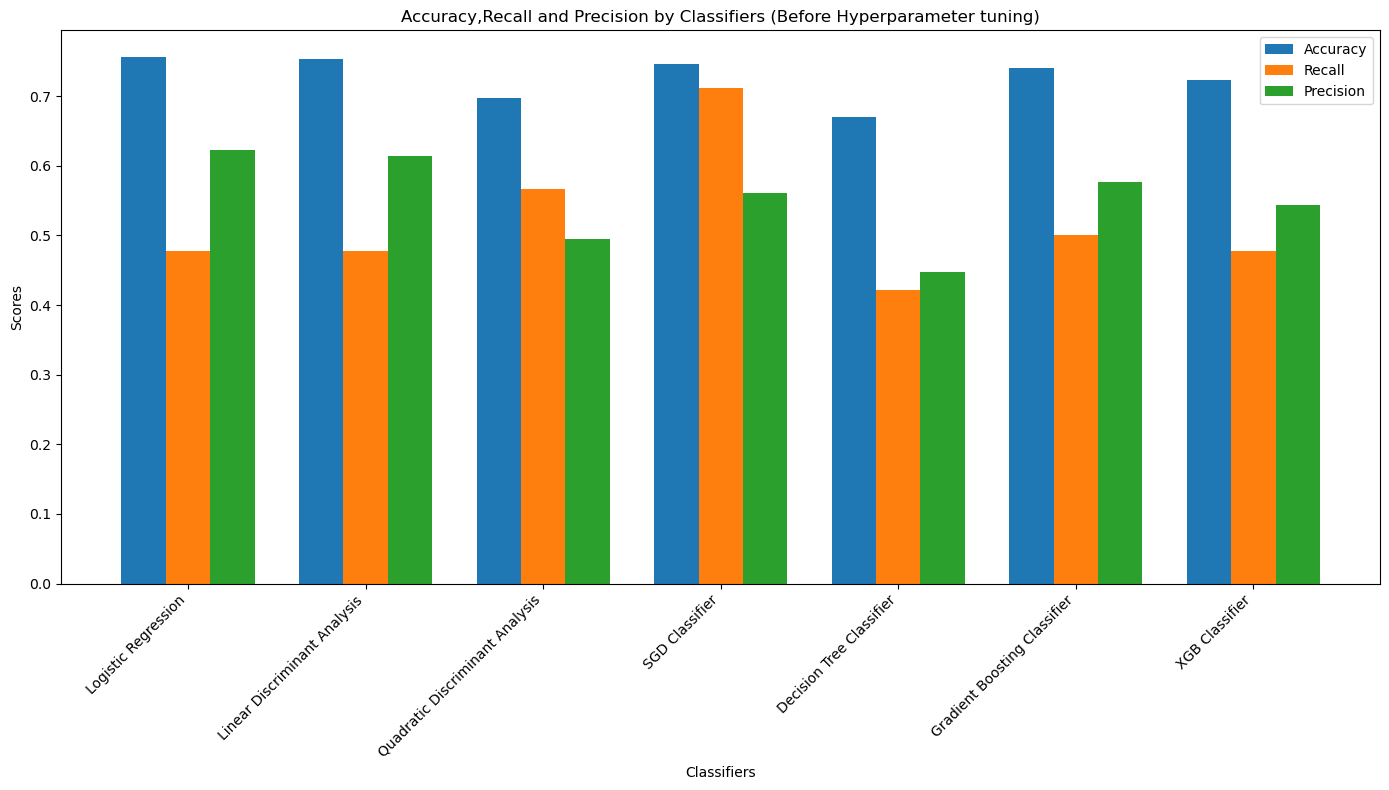

In [30]:
bar_width = 0.25
index = np.arange(len(result_df_test.columns))
plt.figure(figsize=(14, 8))
plt.bar(index, result_df_test.T['accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, result_df_test.T['recall'], bar_width, label='Recall')
plt.bar(index + 2 * bar_width, result_df_test.T['precision'], bar_width, label='Precision')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Accuracy,Recall and Precision by Classifiers (Before Hyperparameter tuning)')
plt.xticks(index + bar_width, result_df_test.columns, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

### HyperParameter Tuning on selected Models

#### Gradient Boosting Model Tuning

In [31]:
resultTuned_df_test = pd.DataFrame()

In [32]:
model_G = GradientBoostingClassifier(random_state=1)
param_grid = {
    "n_estimators": np.arange(10, 150, 10),
    "learning_rate": [0.1, 0.2, 0.3, 0.05],
    "max_depth": [1,2,3,4],
}
randomized_cv = GridSearchCV(estimator=model_G, param_grid=param_grid, scoring='recall', cv=5, n_jobs = -1)
randomized_cv.fit(x_train,y_train)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
  

Best parameters are {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 90} with CV score=0.5285714285714286:


In [33]:

GradientBoostingModel =GradientBoostingClassifier(
    n_estimators=90,
    learning_rate=0.3,
    max_depth=2
).fit(x_train,y_train)

Training performance:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       490
           1       0.90      0.74      0.81       210

    accuracy                           0.90       700
   macro avg       0.90      0.85      0.87       700
weighted avg       0.90      0.90      0.90       700

AUC - ROC 0.8540816326530613
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       210
           1       0.58      0.50      0.54        90

    accuracy                           0.74       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.73      0.74      0.74       300

AUC - ROC 0.6738095238095237
*************************************************


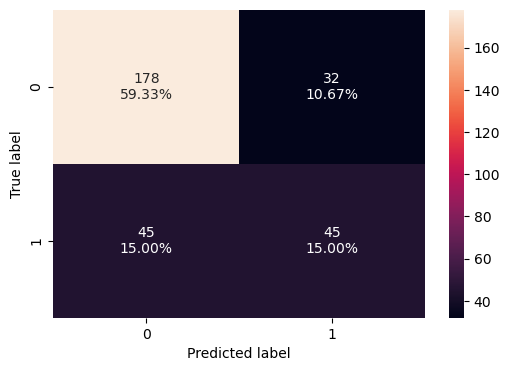

In [34]:
model_performance_classification_sklearn(GradientBoostingModel,x_test,x_train,y_test,y_train)
stats_test = classifier_stats(GradientBoostingModel, x_test, y_test)
resultTuned_df_test['Gradient Boosting Classifier'] = pd.Series(stats_test)
confusion_matrix_sklearn(GradientBoostingModel, x_test, y_test)

####  Logistic Regression

In [35]:
class_counts = y_train.value_counts()
total_samples = len(y_train)
class_weights = total_samples / class_counts


In [36]:
model_LG = LogisticRegression(class_weight={0:class_weights[0],1:class_weights[1]})
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_LG, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
print("Best parameters are {} with CV score={}:" .format(grid_result.best_params_,grid_result.best_score_))

Best parameters are {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} with CV score=0.7333333333333336:


In [37]:
lgModel = LogisticRegression(C=0.01,penalty='l2',solver='liblinear', random_state=1,class_weight={0:class_weights[0],1:class_weights[1]}).fit(x_train,y_train)

Training performance:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       490
           1       0.53      0.77      0.63       210

    accuracy                           0.73       700
   macro avg       0.71      0.74      0.71       700
weighted avg       0.78      0.73      0.74       700

AUC - ROC 0.7418367346938775
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       210
           1       0.50      0.79      0.61        90

    accuracy                           0.70       300
   macro avg       0.69      0.73      0.69       300
weighted avg       0.77      0.70      0.72       300

AUC - ROC 0.7277777777777779
*************************************************


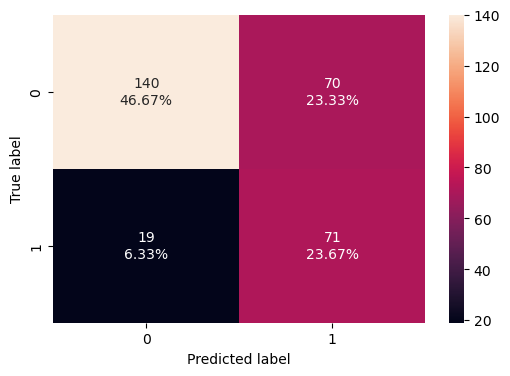

In [38]:
model_performance_classification_sklearn(lgModel,x_test,x_train,y_test,y_train)

stats_test =classifier_stats(lgModel, x_test, y_test)
resultTuned_df_test['Logistic Regression'] = pd.Series(stats_test)
confusion_matrix_sklearn(lgModel, x_test, y_test)

#### Linear Discriminant Analysis

In [39]:
model_LDA1 = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
search = GridSearchCV(model_LDA1, grid, scoring='recall', cv=cv, n_jobs=-1)
results1 = search.fit(x_train, y_train)
print("Best parameters are {} with CV score={}:" .format(results1.best_params_,results1.best_score_))

Best parameters are {'solver': 'lsqr'} with CV score=0.42539682539682544:


In [40]:
model_LDA2 = LinearDiscriminantAnalysis(solver='lsqr')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['shrinkage'] = np.arange(0, 1, 0.01)
search = GridSearchCV(model_LDA2, grid, scoring='recall', cv=cv, n_jobs=-1)
results2 = search.fit(x_train, y_train)
print("Best parameters are {} with CV score={}:" .format(results2.best_params_,results2.best_score_))

Best parameters are {'shrinkage': 0.99} with CV score=0.5142857142857142:


In [41]:
LDA = LinearDiscriminantAnalysis(shrinkage=0.99,solver='lsqr').fit(x_train,y_train)

Training performance:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       490
           1       0.59      0.56      0.57       210

    accuracy                           0.75       700
   macro avg       0.70      0.69      0.70       700
weighted avg       0.75      0.75      0.75       700

AUC - ROC 0.6948979591836735
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       210
           1       0.58      0.58      0.58        90

    accuracy                           0.75       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.75      0.75      0.75       300

AUC - ROC 0.7007936507936507
*************************************************


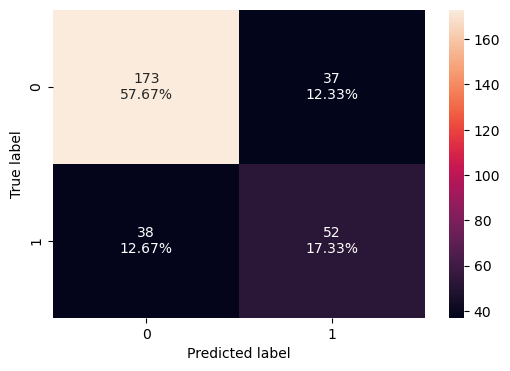

In [42]:
model_performance_classification_sklearn(LDA,x_test,x_train,y_test,y_train)

stats_test =classifier_stats(LDA, x_test, y_test)
resultTuned_df_test['Linear Discriminant Analysis'] = pd.Series(stats_test)
confusion_matrix_sklearn(LDA, x_test, y_test)

#### Quadratic Discriminant Analysis

In [43]:
params_QDA = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]
model_QDA = QuadraticDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
search_QDA = GridSearchCV(model_QDA, params_QDA, scoring='recall', cv=cv, n_jobs=-1)
results2 = search_QDA.fit(x_train, y_train)
print("Best parameters are {} with CV score={}:" .format(results2.best_params_,results2.best_score_))

Best parameters are {'reg_param': 0.3} with CV score=0.5809523809523809:


In [44]:
QDA = QuadraticDiscriminantAnalysis(reg_param=0.3).fit(x_train,y_train)

Training performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       490
           1       0.66      0.71      0.68       210

    accuracy                           0.80       700
   macro avg       0.76      0.78      0.77       700
weighted avg       0.81      0.80      0.80       700

AUC - ROC 0.776530612244898
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       210
           1       0.52      0.57      0.54        90

    accuracy                           0.71       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.72      0.71      0.71       300

AUC - ROC 0.6690476190476191
*************************************************


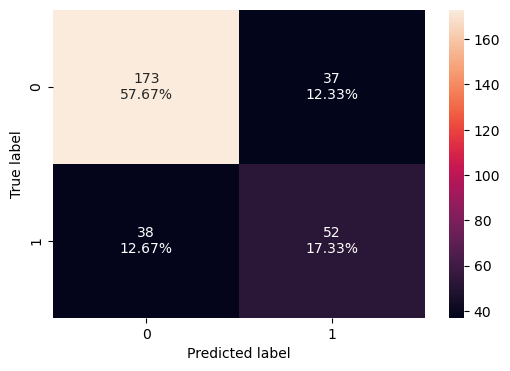

In [45]:
model_performance_classification_sklearn(QDA,x_test,x_train,y_test,y_train)

stats_test =classifier_stats(QDA, x_test, y_test)
resultTuned_df_test['Quadratic Discriminant Analysis'] = pd.Series(stats_test)
confusion_matrix_sklearn(LDA, x_test, y_test)

#### SGD Classifier

In [46]:
#hyperparameter tuning
param_sgd = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    'max_iter': [1000],
    'loss': ['log_loss', 'squared_error','squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'n_jobs': [-1]
}
model_SGD = SGDClassifier(class_weight={0:class_weights[0],1:class_weights[1]})
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
search_SGD = GridSearchCV(model_SGD, param_sgd, scoring='recall', cv=cv, n_jobs=-1)
results_SGD = search_SGD.fit(x_train, y_train)
print("Best parameters are {} with CV score={}:" .format(results_SGD.best_params_,results_SGD.best_score_))

Best parameters are {'alpha': 0.1, 'loss': 'log_loss', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l1'} with CV score=0.7269841269841273:


In [47]:
model_SGD = SGDClassifier(class_weight={0:class_weights[0],1:class_weights[1]},alpha=0.1, loss='log_loss',max_iter= 1000, n_jobs= -1,penalty='l1', random_state=1).fit(x_train,y_train)

Training performance:
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       490
           1       0.48      0.71      0.57       210

    accuracy                           0.68       700
   macro avg       0.66      0.69      0.66       700
weighted avg       0.74      0.68      0.69       700

AUC - ROC 0.6908163265306123
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       210
           1       0.50      0.72      0.59        90

    accuracy                           0.70       300
   macro avg       0.68      0.71      0.68       300
weighted avg       0.75      0.70      0.71       300

AUC - ROC 0.7087301587301588
*************************************************


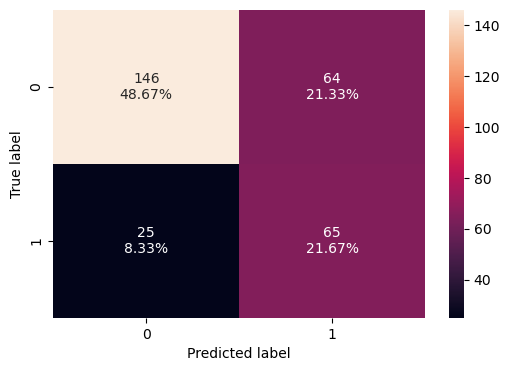

In [48]:
model_performance_classification_sklearn(model_SGD,x_test,x_train,y_test,y_train)

stats_test =classifier_stats(model_SGD, x_test, y_test)
resultTuned_df_test['SGD Classifier'] = pd.Series(stats_test)
confusion_matrix_sklearn(model_SGD, x_test, y_test)

#### Decision Tree Classifier

In [49]:
#hyperparameter tuning
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,11,None]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search_DT = GridSearchCV(DecisionTreeClassifier(class_weight={0:class_weights[0],1:class_weights[1]}), parameters,  scoring='recall',cv=cv, n_jobs=-1)
results_DT = search_DT.fit(x_train, y_train)
print("Best parameters are {} with CV score={}:" .format(results_DT.best_params_,results_DT.best_score_))

Best parameters are {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2} with CV score=0.823809523809524:


In [50]:
model_DT = DecisionTreeClassifier(class_weight={0:class_weights[0],1:class_weights[1]},criterion= 'gini', max_depth = 1,min_samples_split= 2,max_leaf_nodes=2,random_state=1).fit(x_train,y_train)

Training performance:
              precision    recall  f1-score   support

           0       0.86      0.48      0.61       490
           1       0.40      0.82      0.54       210

    accuracy                           0.58       700
   macro avg       0.63      0.65      0.58       700
weighted avg       0.72      0.58      0.59       700

AUC - ROC 0.6496598639455782
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.93      0.55      0.69       210
           1       0.46      0.90      0.61        90

    accuracy                           0.65       300
   macro avg       0.69      0.72      0.65       300
weighted avg       0.79      0.65      0.66       300

AUC - ROC 0.7238095238095239
*************************************************


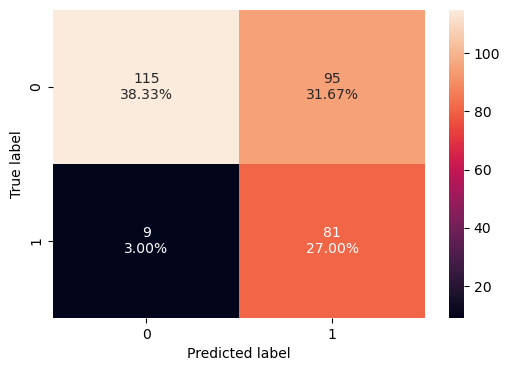

In [51]:
model_performance_classification_sklearn(model_DT,x_test,x_train,y_test,y_train)

stats_test =classifier_stats(model_DT, x_test, y_test)
resultTuned_df_test['Decision Tree Classifier'] = pd.Series(stats_test)
confusion_matrix_sklearn(model_DT, x_test, y_test)

#### XGBClassifier

In [52]:
# hyperparameter tuning
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,10),
            'scale_pos_weight':[2.1,2.2,2.3,2.4,2.5],
            'learning_rate':np.arange(0.01,2,10),
            'gamma':[1,2,3],
            'subsample':[0.8,0.9,1],
            'max_depth':[1],
            'reg_lambda':[5,10]}

scorer = metrics.make_scorer(metrics.recall_score)

xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

xgb_tuned.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 2.3, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.8238095238095239:


In [53]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=2.3,
    gamma=1,
    subsample=0.8,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
    objective= 'binary:logistic'
)
# Fit the model on training data
xgb_tuned1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
              precision    recall  f1-score   support

           0       0.86      0.48      0.61       490
           1       0.40      0.82      0.54       210

    accuracy                           0.58       700
   macro avg       0.63      0.65      0.58       700
weighted avg       0.72      0.58      0.59       700

AUC - ROC 0.6496598639455782
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.93      0.55      0.69       210
           1       0.46      0.90      0.61        90

    accuracy                           0.65       300
   macro avg       0.69      0.72      0.65       300
weighted avg       0.79      0.65      0.66       300

AUC - ROC 0.7238095238095239
*************************************************


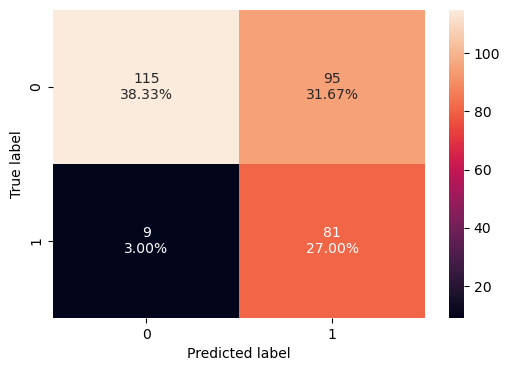

In [54]:
model_performance_classification_sklearn(xgb_tuned1,x_test,x_train,y_test,y_train)

stats_test =classifier_stats(xgb_tuned1, x_test, y_test)
resultTuned_df_test['XGB Classifier'] = pd.Series(stats_test)
confusion_matrix_sklearn(xgb_tuned1, x_test, y_test)

In [55]:
resultTuned_df_test

,Gradient Boosting Classifier,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,SGD Classifier,Decision Tree Classifier,XGB Classifier
prior_error_rate,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000
total_error_rate,0.256667,0.296667,0.250000,0.290000,0.296667,0.346667,0.346667
recall,0.500000,0.788889,0.577778,0.566667,0.722222,0.900000,0.900000
false_negative_rate,0.500000,0.211111,0.422222,0.433333,0.277778,0.100000,0.100000
false_positive_rate,0.152381,0.333333,0.176190,0.228571,0.304762,0.452381,0.452381
true_negative_rate (specificity),0.847619,0.666667,0.823810,0.771429,0.695238,0.547619,0.547619
precision,0.584416,0.503546,0.584270,0.515152,0.503876,0.460227,0.460227
negative_predictive_value,0.798206,0.880503,0.819905,0.805970,0.853801,0.927419,0.927419
accuracy,0.743333,0.703333,0.750000,0.710000,0.703333,0.653333,0.653333


### ROC Curve

In [56]:
pred_prob1 = xgb_tuned1.predict_proba(x_test)
pred_prob2 = GradientBoostingModel.predict_proba(x_test)
pred_prob3 = lgModel.predict_proba(x_test)
pred_prob4 = LDA.predict_proba(x_test)
pred_prob5 = QDA.predict_proba(x_test)
pred_prob6 = model_SGD.decision_function(x_test)
pred_prob7 = model_DT.predict_proba(x_test)


# roc curve for models
fpr1, tpr1, _= roc_curve(y_test, pred_prob1[:,1])
fpr2, tpr2, _ = roc_curve(y_test, pred_prob2[:,1])
fpr3, tpr3, _ = roc_curve(y_test, pred_prob3[:,1])
fpr4, tpr4, _ = roc_curve(y_test, pred_prob4[:,1])
fpr5, tpr5, _ = roc_curve(y_test, pred_prob5[:,1])
fpr6, tpr6, _ = roc_curve(y_test, pred_prob6)
fpr7, tpr7, _ = roc_curve(y_test, pred_prob7[:,1])


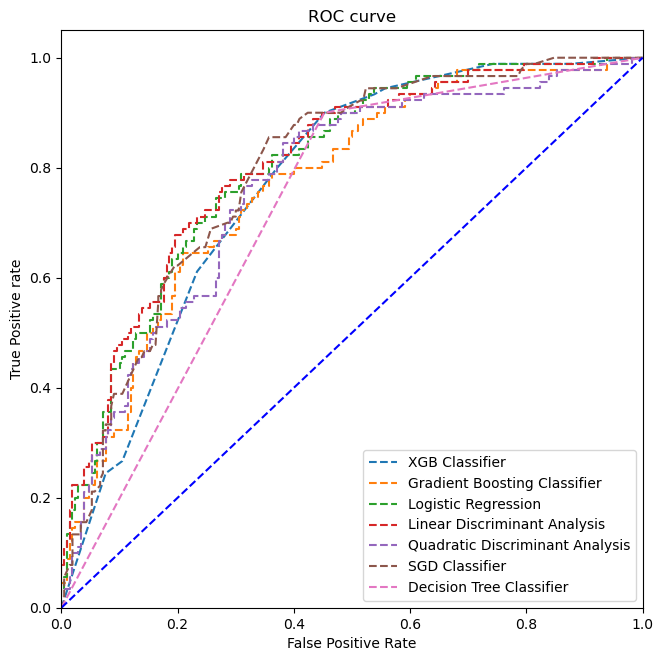

In [57]:
model_names= ['XGB Classifier','Gradient Boosting Classifier','Logistic Regression','Linear Discriminant Analysis','Quadratic Discriminant Analysis',
             'SGD Classifier','Decision Tree Classifier']

plt.figure(figsize=(7.5, 7.5))
plt.plot(fpr1, tpr1, linestyle='--', label=model_names[0])
plt.plot(fpr2, tpr2, linestyle='--', label=model_names[1])
plt.plot(fpr3, tpr3, linestyle='--', label=model_names[2])
plt.plot(fpr4, tpr4, linestyle='--', label=model_names[3])
plt.plot(fpr5, tpr5, linestyle='--', label=model_names[4])
plt.plot(fpr6, tpr6, linestyle='--', label=model_names[5])
plt.plot(fpr7, tpr7, linestyle='--', label=model_names[6])
plt.plot([0, 1], [0, 1], linestyle='--',color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [58]:
auc_roc_score= []
auc_roc_score.append(roc_auc_score(y_test, pred_prob1[:,1]))
auc_roc_score.append(roc_auc_score(y_test, pred_prob2[:,1]))
auc_roc_score.append(roc_auc_score(y_test, pred_prob3[:,1]))
auc_roc_score.append(roc_auc_score(y_test, pred_prob4[:,1]))
auc_roc_score.append(roc_auc_score(y_test, pred_prob5[:,1]))
auc_roc_score.append(roc_auc_score(y_test, pred_prob6))
auc_roc_score.append(roc_auc_score(y_test, pred_prob7[:,1]))
auc_roc_df = pd.DataFrame({'Model': model_names, 'AUC-ROC': auc_roc_score}).sort_values(by='AUC-ROC',ascending=False)

In [59]:
auc_roc_df

,Model,AUC-ROC
3,Linear Discriminant Analysis,0.807037
2,Logistic Regression,0.802540
5,SGD Classifier,0.795899
0,XGB Classifier,0.770238
1,Gradient Boosting Classifier,0.770053
4,Quadratic Discriminant Analysis,0.767037
6,Decision Tree Classifier,0.723810


### PRC curve

In [60]:
# roc curve for models
pr1, re1, _ = precision_recall_curve(y_test, pred_prob1[:,1])
pr2, re2, _ = precision_recall_curve(y_test, pred_prob2[:,1])
pr3, re3, _ = precision_recall_curve(y_test, pred_prob3[:,1])
pr4, re4, _ = precision_recall_curve(y_test, pred_prob4[:,1])
pr5, re5, _ = precision_recall_curve(y_test, pred_prob5[:,1])
pr6, re6, _ = precision_recall_curve(y_test, pred_prob6)
pr7, re7, _ = precision_recall_curve(y_test, pred_prob7[:,1])

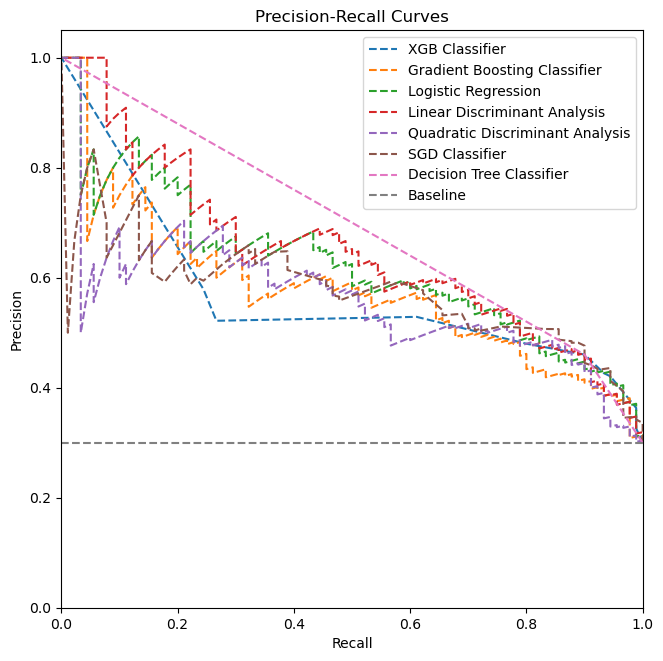

In [61]:
plt.figure(figsize=(7.5, 7.5))
plt.plot(re1, pr1, linestyle='--', label=model_names[0])
plt.plot(re2, pr2, linestyle='--', label=model_names[1])
plt.plot(re3, pr3, linestyle='--', label=model_names[2])
plt.plot(re4, pr4, linestyle='--', label=model_names[3])
plt.plot(re5, pr5, linestyle='--', label=model_names[4])
plt.plot(re6, pr6, linestyle='--', label=model_names[5])
plt.plot(re7, pr7, linestyle='--', label=model_names[6])
prb = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [prb, prb], linestyle='--', label='Baseline', color='gray')
# title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


In [62]:
auc_score= []
auc_score.append(auc(re1, pr1))
auc_score.append(auc(re2, pr2))
auc_score.append(auc(re3, pr3))
auc_score.append(auc(re4, pr4))
auc_score.append(auc(re5, pr5))
auc_score.append(auc(re6, pr6))
auc_score.append(auc(re7, pr7))
auc_df = pd.DataFrame({'Model': model_names, 'AUC_PR': auc_score}).sort_values(by='AUC_PR',ascending=False)

In [63]:
auc_df

,Model,AUC_PR
6,Decision Tree Classifier,0.695114
3,Linear Discriminant Analysis,0.645326
2,Logistic Regression,0.619596
1,Gradient Boosting Classifier,0.575460
5,SGD Classifier,0.574972
0,XGB Classifier,0.568823
4,Quadratic Discriminant Analysis,0.559405


In [64]:
model_1 = ('xgb', xgb_tuned1)
model_2 = ('gb', GradientBoostingModel)
model_3 = ('lg', lgModel)
model_4 = ('lda', LDA)
model_5 = ('qda', QDA)
model_6 = ('dt', model_DT)
model_7 = ('sgd', model_SGD)

The models are selected based on the top three models from AUC-PR, AUC-ROC  and highest recall models.The selected models are XGB(High recall),Decision tree classifier(High recall,Auc-PR High),LDA(AUC-PR),Logistic regression(AUC-PR), SGD(AUC-ROC).

In [65]:

voting_clf = VotingClassifier(
     estimators=[model_1, model_3,model_4, model_6,model_7],
    voting='soft'
)
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=1,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_...
                             ('lda',
                              LinearDiscriminantAnalysis(shrinkage=0.99,
                                                         solver='lsqr')),
                             ('dt',
                              DecisionTreeClassifier(class_weight={0: 1.4285714285714286,
                                                                   1: 3.3333333333333335},
                                                     max_depth=1,
                                                     max_leaf_nodes=2,
                                                     random_state=1)),
                             ('sgd',
                              SGDClassifier(alpha=0.1,
                                            class_weight={0: 1.4285714285714286,
                                                          1: 3.3333333333333335},
                                            loss='log_loss', n_jobs=-1,
                                            penalty='l1', random_state=1))],
                 voting='soft')

Training performance:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       490
           1       0.53      0.67      0.59       210

    accuracy                           0.72       700
   macro avg       0.68      0.71      0.69       700
weighted avg       0.75      0.72      0.73       700

AUC - ROC 0.7071428571428571
*************************************************
Test performance:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       210
           1       0.57      0.77      0.65        90

    accuracy                           0.76       300
   macro avg       0.73      0.76      0.73       300
weighted avg       0.79      0.76      0.76       300

AUC - ROC 0.7595238095238095
*************************************************


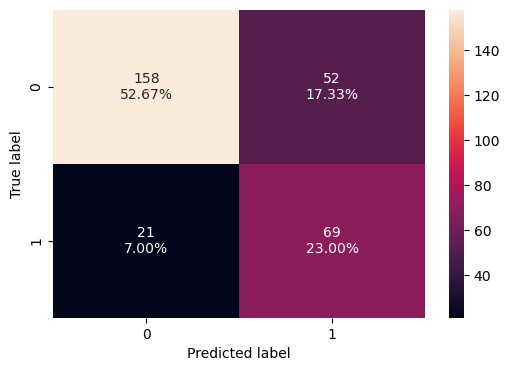

In [66]:
model_performance_classification_sklearn(voting_clf,x_test,x_train,y_test,y_train)

stats_test =classifier_stats(voting_clf, x_test, y_test)

resultTuned_df_test['Voting Classifier'] = pd.Series(stats_test)
confusion_matrix_sklearn(voting_clf, x_test, y_test)

In [67]:
pred_probV = voting_clf.predict_proba(x_test)
prv, rev, _ = precision_recall_curve(y_test, pred_probV[:,1])

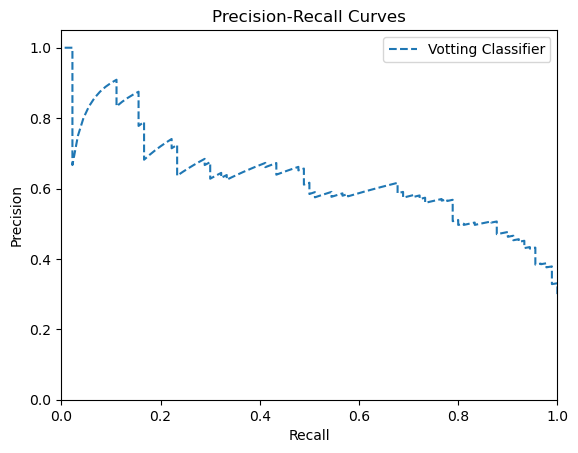

In [68]:
plt.plot(rev, prv, linestyle='--', label='Votting Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [69]:
print("Area under curve Precision Recall curve for Voting Classfier",auc(rev, prv))

Area under curve Precision Recall curve for Voting Classfier 0.6297603666208385


In [70]:
resultTuned_df_test

,Gradient Boosting Classifier,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,SGD Classifier,Decision Tree Classifier,XGB Classifier,Voting Classifier
prior_error_rate,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000
total_error_rate,0.256667,0.296667,0.250000,0.290000,0.296667,0.346667,0.346667,0.243333
recall,0.500000,0.788889,0.577778,0.566667,0.722222,0.900000,0.900000,0.766667
false_negative_rate,0.500000,0.211111,0.422222,0.433333,0.277778,0.100000,0.100000,0.233333
false_positive_rate,0.152381,0.333333,0.176190,0.228571,0.304762,0.452381,0.452381,0.247619
true_negative_rate (specificity),0.847619,0.666667,0.823810,0.771429,0.695238,0.547619,0.547619,0.752381
precision,0.584416,0.503546,0.584270,0.515152,0.503876,0.460227,0.460227,0.570248
negative_predictive_value,0.798206,0.880503,0.819905,0.805970,0.853801,0.927419,0.927419,0.882682
accuracy,0.743333,0.703333,0.750000,0.710000,0.703333,0.653333,0.653333,0.756667


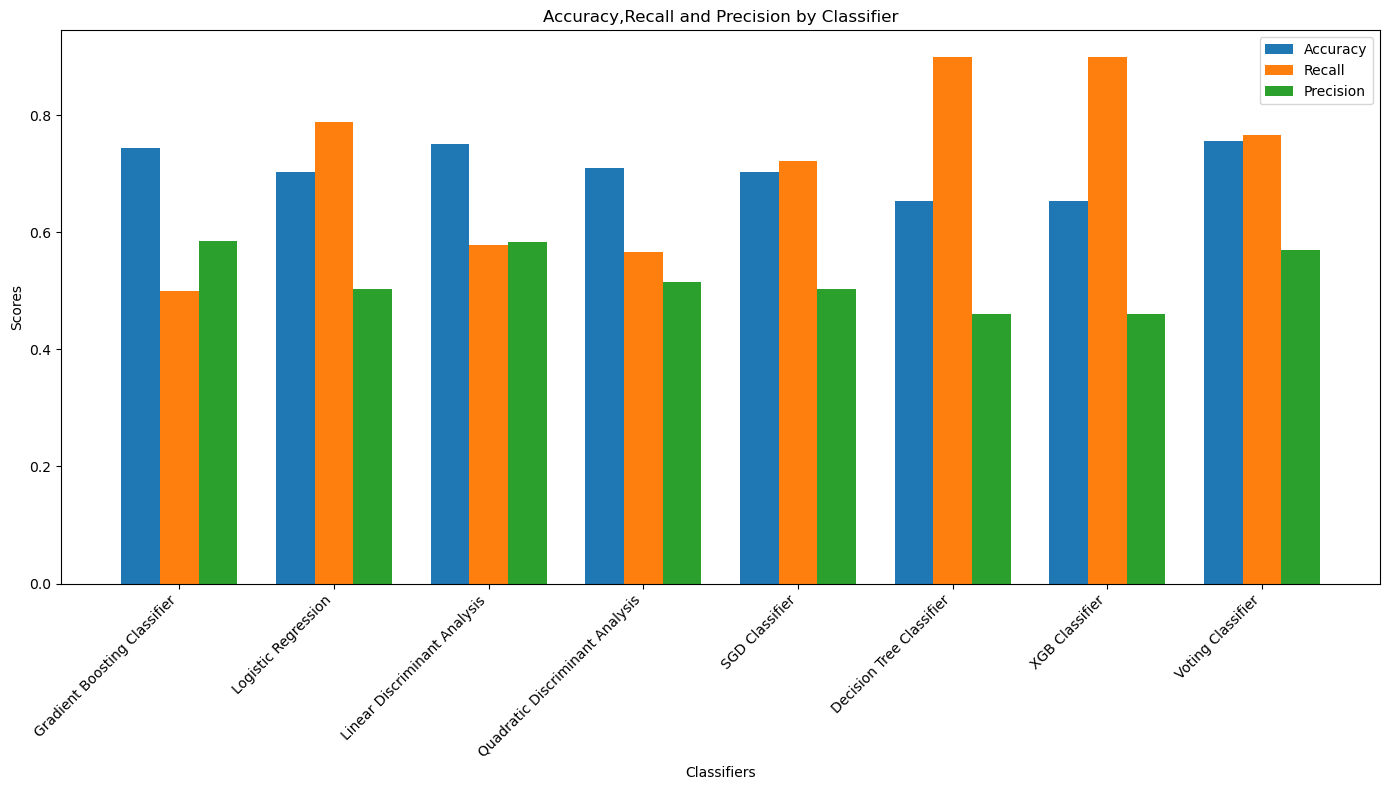

In [71]:
bar_width = 0.25
index = np.arange(len(resultTuned_df_test.columns))
plt.figure(figsize=(14, 8))
plt.bar(index, resultTuned_df_test.T['accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, resultTuned_df_test.T['recall'], bar_width, label='Recall')
plt.bar(index + 2 * bar_width, resultTuned_df_test.T['precision'], bar_width, label='Precision')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Accuracy,Recall and Precision by Classifier')
plt.xticks(index + bar_width, resultTuned_df_test.columns, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

The classification report of the voting classifier and the confusion matrix.  When we analyze the report of the Voting classifier model, it shows great accuracy(76%) and recall (0.77), which are above 75%.  By looking at the confusion matrix, we observe very few false negatives, accounting for only 21, making it the lowest total error rate(0.24) we have ever encountered among all models .  It is important to note that the model achieved the highest F1 score without compromising the AUC-PR (0.63)(see Figure 23), and it achieved the second-highest precision of 0.57, which is outstanding.The plot shows the comparison of the voting classifier with other models.
